In [7]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from joblib import load  
from sklearn.metrics import ConfusionMatrixDisplay

In [8]:
results_df = pd.read_csv('../reports/model_results.csv')  
results_df.head()

,model,cv_accuracy_mean,cv_precision_mean,cv_recall_mean,cv_f1_mean,cv_auc_mean,test_accuracy,test_precision,test_recall,test_f1,test_auc,train_time_s
0,RandomForestClassifier | StandardScaler | OneH...,0.927111,0.840245,0.897659,0.867481,0.975950,0.924662,0.836683,0.890374,0.862694,0.913725,2.53
1,RandomForestClassifier | MinMaxScaler | OneHot...,0.926044,0.834918,0.901003,0.866218,0.975319,0.925373,0.833747,0.898396,0.864865,0.916768,2.73
2,XGBClassifier | MinMaxScaler | OneHotEncoder,0.925333,0.844543,0.882943,0.862817,0.979858,0.922530,0.842377,0.871658,0.856767,0.906303,0.50
3,XGBClassifier | StandardScaler | OneHotEncoder,0.923733,0.845652,0.873579,0.858938,0.979859,0.923952,0.844961,0.874332,0.859396,0.908124,0.68
4,DecisionTreeClassifier | StandardScaler | OneH...,0.915733,0.801159,0.909699,0.851619,0.956412,0.909737,0.787879,0.903743,0.841843,0.907825,0.09


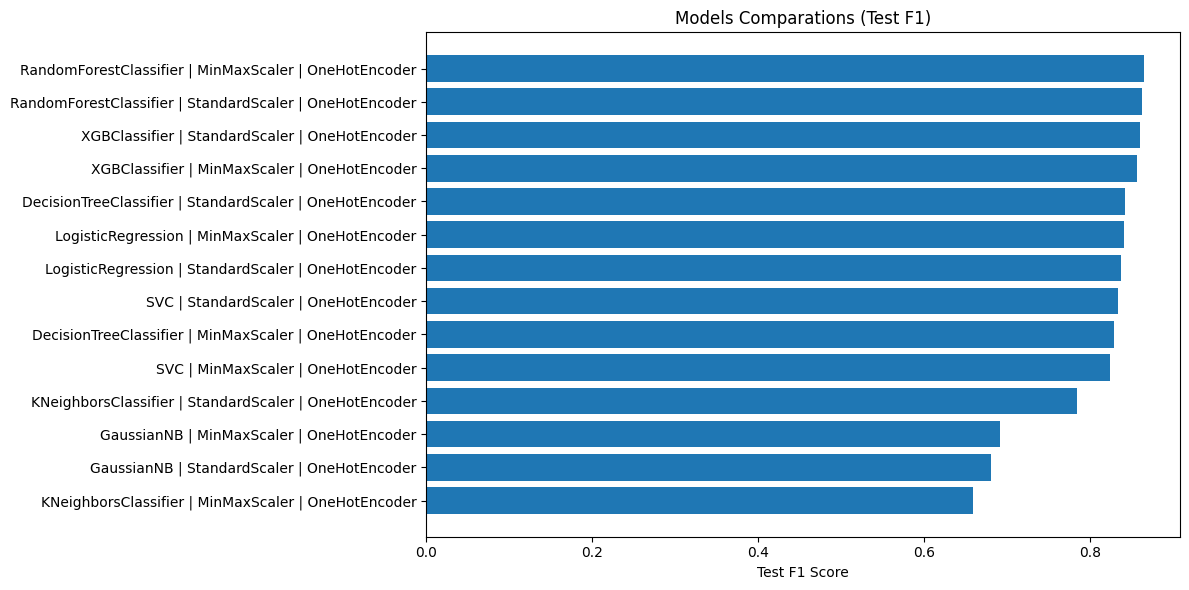

In [9]:
plt.figure(figsize=(12, 6))  
res_sorted = results_df.sort_values(by='test_f1', ascending=True)  
plt.barh(res_sorted['model'], res_sorted['test_f1'])  
plt.xlabel('Test F1 Score')  
plt.title('Models Comparations (Test F1)')  
plt.tight_layout()  
plt.show()

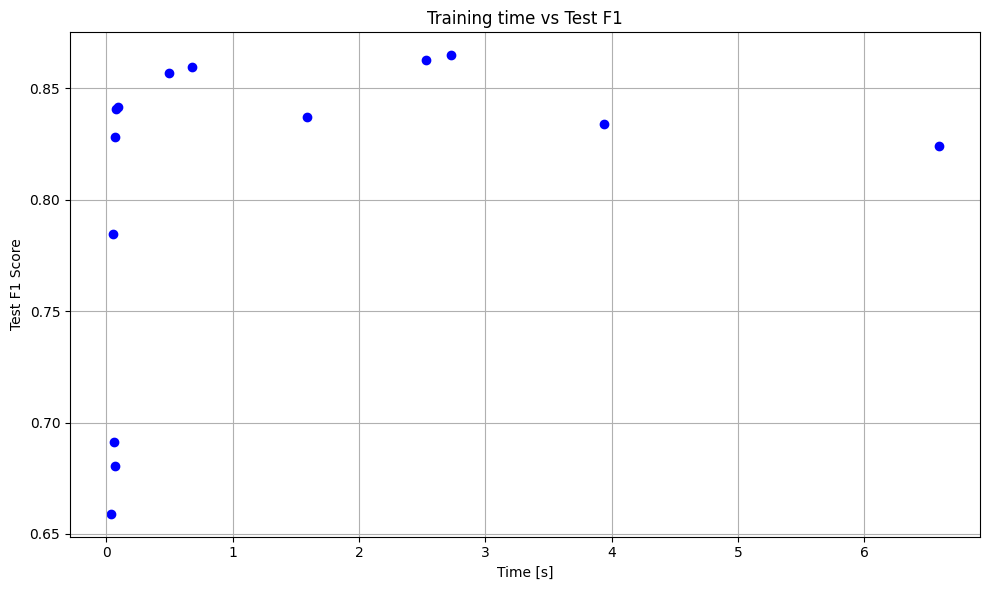

In [10]:
plt.figure(figsize=(10, 6))  
plt.scatter(results_df['train_time_s'], results_df['test_f1'], c='blue')  
plt.xlabel('Time [s]')  
plt.ylabel('Test F1 Score')  
plt.title('Training time vs Test F1')  
plt.grid(True)  
plt.tight_layout()  
plt.show()

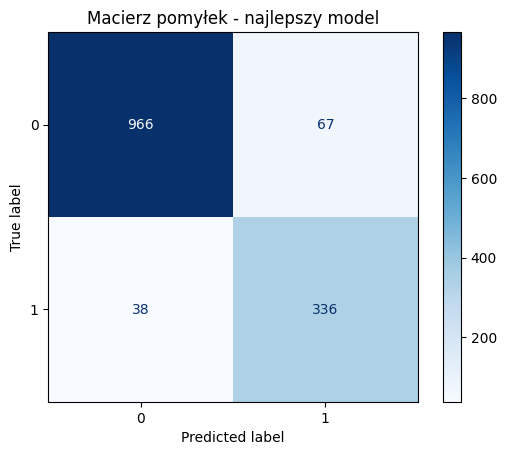

In [11]:
X_test = pd.read_parquet('../data/splits/X_test.parquet')
y_test = pd.read_parquet('../data/splits/y_test.parquet')

model = load('../models/best_ImbPipeline.pkl')
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Macierz pomyłek - najlepszy model')
plt.show()
